In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import Dataset
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
videos = Dataset.load_from_disk('../data/videos')
labels = np.load('../data/cluster_labels.npy')

In [4]:
df = pd.DataFrame(videos)
df['label'] = labels

In [5]:
group_0 = df.loc[df['label'] == 0]

In [6]:
corpus = ''
for index, row in group_0.iterrows():
    corpus = corpus + row['text']

In [7]:
doc = nlp(text=corpus)

In [8]:
lemmatized_corpus = []
for token in doc:
    lemmatized_corpus.append(token)

In [9]:
lemmatized_corpus_eng_words = []
words = set(nlp.vocab.strings)
for word in lemmatized_corpus:
    if str(word) in words and not word.is_stop and not word.is_punct and not word.is_digit and not str(word) == '|':
        lemmatized_corpus_eng_words.append(word)

In [10]:
lemmatized_sentence = " ".join([token.lemma_ for token in lemmatized_corpus_eng_words])

In [11]:
wc = WordCloud(width=1600, height=800).generate_from_text(lemmatized_sentence)

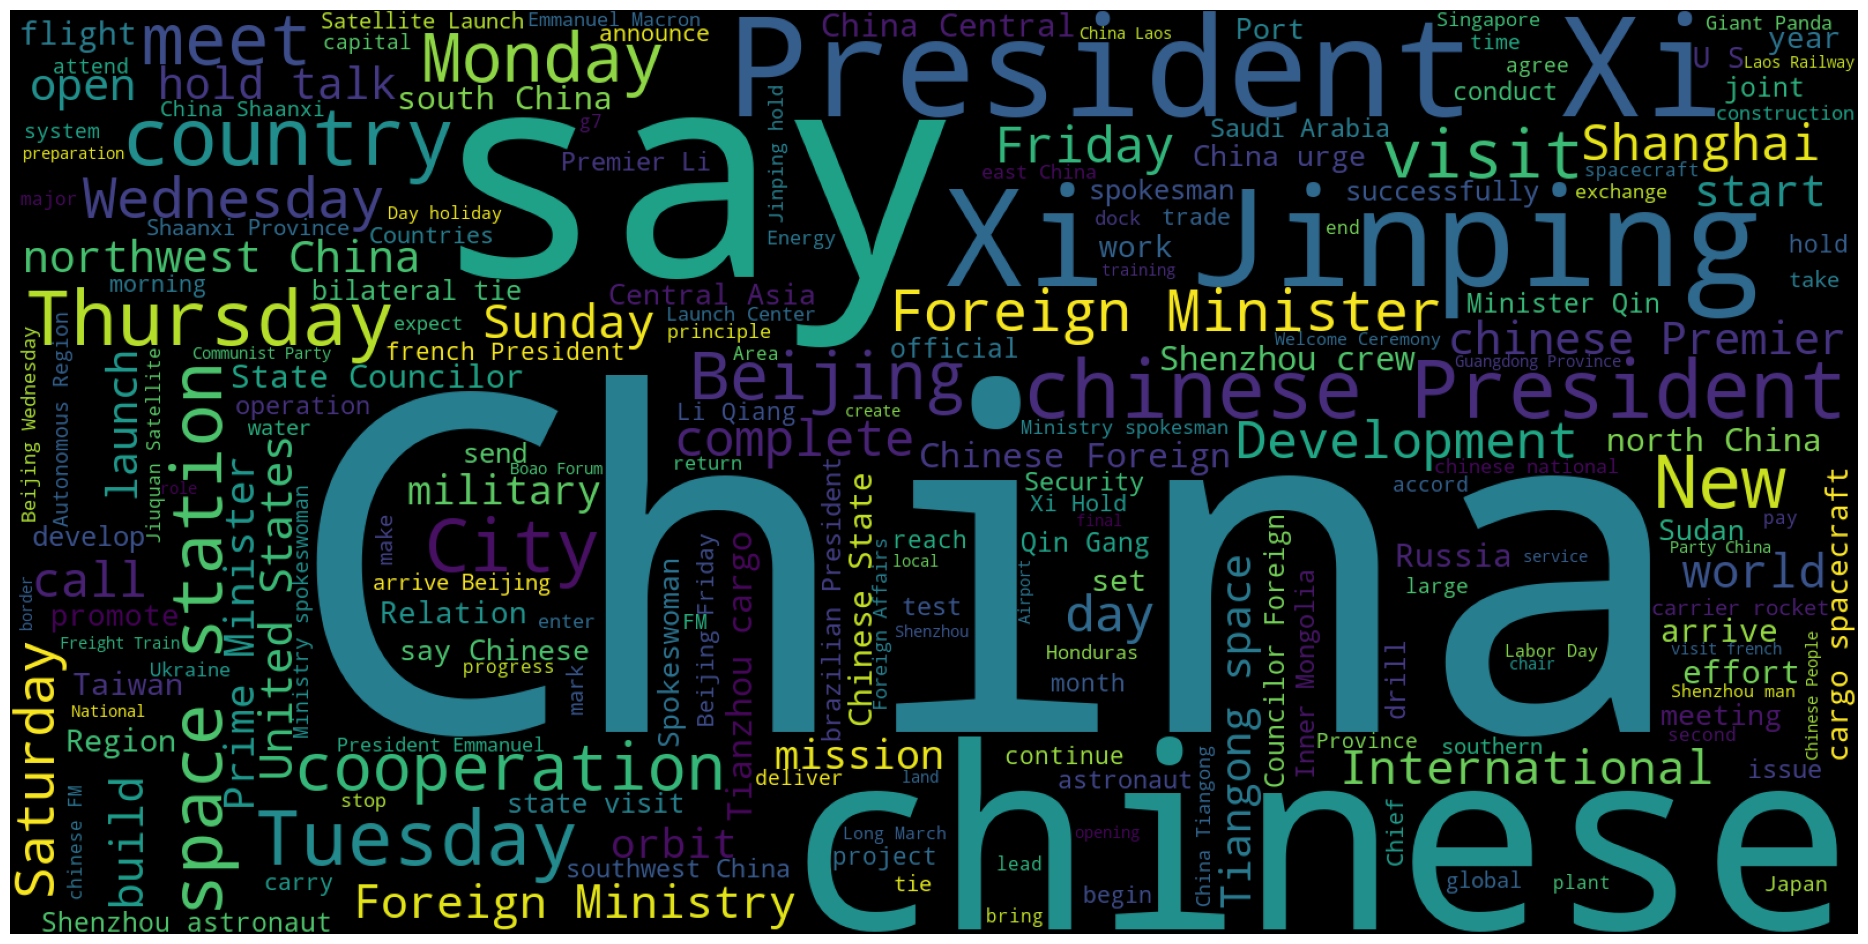

In [12]:
fig, ax = plt.subplots(figsize=(24,12))
plt.imshow(wc)
plt.axis('off')
plt.show()